In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import KFold, cross_val_score, train_test_split, cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from math import sqrt

from scipy import stats
from scipy.spatial.distance import cdist
from scipy.special import boxcox
from scipy.special import inv_boxcox

pd.set_option('display.max_columns', None)

D:\Anaconda\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dataset = pd.read_csv('dataset.csv')
dataset.tail()

,Unnamed: 0,TRIP_ID,SUB_ID,SEGMENT_ID,START_TIME,END_TIME,START_LATITUDE,START_LONGITUDE,LAST_LATITUDE,LAST_LONGITUDE,START_ALTITUDE,LAST_ALTITUDE,AVG_ALTITUDE,START_SOC,END_SOC,START_GIDS,END_GIDS,SOH,AVG_SPEED,RUN_TIME,TRIP_TIME,DROP_TIME,BETTERY_TEMPERATURA,AMBIENT_TEMPERATURA,EV_POWER,RUN_POWER,AUX_POWER,AC_POWER,Est_AC_POWER,ALL_Consumption_Wh,RUN_Consumption_Wh,AUX_Consumption_Wh,AC_Consumption_Wh,EST_AC_Consumption_Wh,TEMPERATURE_yokohama,TEMPERATURE_ebina,HUMIDITY,WIND_SPEED_yokohama,WIND_SPEED_ebina,ILLUMINANCE,PRECIPITATION_START_yokohama,PRECIPITATION_END_yokohama,PRECIPITATION_START_ebina,PRECIPITATION_END_ebina,WEATHER,ILLUMINANCE_Log,TRIP_TEMPERATURE
17464,17464,4560,1,22,2023-08-30 10:50:00,2023-08-30 10:50:00,35.449129,139.567853,35.452739,139.576851,57.7,64.2,59.858333,728318,726240,522,521,91.97,70.764000,3817.0,51.0,0.0,32.358333,32.833333,8988.018412,8038.018412,200.000000,750.000000,666.666667,123.898511,110.440178,2.833333,10.625000,9.444444,31.9,31.799999,20.857681,5.20,3.5,38488.187489,0.0,0.0,0.0,0.0,晴のち曇,4,32.000791
17465,17465,4560,1,23,2023-08-30 10:50:00,2023-08-30 11:00:00,35.452996,139.577632,35.458544,139.585216,60.5,34.8,46.375000,726224,726472,521,521,91.97,70.881001,3868.0,51.0,0.0,32.366667,33.000000,-1109.831677,-2059.831677,200.000000,750.000000,716.666667,-15.617443,-29.075777,2.833333,10.625000,10.166667,31.9,31.974999,21.109992,5.15,3.4,37195.114358,0.0,0.0,0.0,0.0,晴のち曇,4,32.000791
17466,17466,4560,1,24,2023-08-30 11:00:00,2023-08-30 11:00:00,35.459174,139.585967,35.465691,139.591233,32.4,24.4,24.725000,726530,725422,521,520,91.97,69.768000,3918.0,50.0,0.0,32.386111,33.291667,4570.528872,3620.528872,200.000000,750.000000,720.833333,62.262229,49.067784,2.777778,10.416667,10.000000,31.9,32.500000,21.866924,5.00,3.1,33315.894966,0.0,0.0,0.0,0.0,晴のち曇,4,32.000791
17467,17467,4560,1,25,2023-08-30 11:00:00,2023-08-30 11:00:00,35.466307,139.591511,35.472796,139.595000,25.8,49.0,42.200000,725100,722048,520,518,91.97,27.947172,4047.0,129.0,0.0,32.440230,33.500000,4200.582567,3250.582567,200.000000,750.000000,743.103448,132.393101,98.351435,7.166667,26.875000,26.527778,31.9,32.500000,21.866924,5.00,3.1,33315.894966,0.0,0.0,0.0,0.0,晴のち曇,4,32.000791
17468,17468,4560,1,26,2023-08-30 11:00:00,2023-08-30 11:00:00,35.472929,139.594838,35.472286,139.586766,49.3,50.9,48.887097,721812,718416,518,515,91.97,15.419032,4310.0,263.0,0.0,32.493011,33.233871,2664.847759,1729.363888,217.741935,717.741935,740.322581,192.796632,124.282743,15.944444,52.569444,54.180556,31.9,32.500000,21.866924,5.00,3.1,33315.894966,0.0,0.0,0.0,0.0,晴のち曇,4,32.000791


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17469 entries, 0 to 17468
Data columns (total 47 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    17469 non-null  int64  
 1   TRIP_ID                       17469 non-null  int64  
 2   SUB_ID                        17469 non-null  int64  
 3   SEGMENT_ID                    17469 non-null  int64  
 4   START_TIME                    17469 non-null  object 
 5   END_TIME                      17469 non-null  object 
 6   START_LATITUDE                17469 non-null  float64
 7   START_LONGITUDE               17469 non-null  float64
 8   LAST_LATITUDE                 17469 non-null  float64
 9   LAST_LONGITUDE                17469 non-null  float64
 10  START_ALTITUDE                17469 non-null  float64
 11  LAST_ALTITUDE                 17469 non-null  float64
 12  AVG_ALTITUDE                  17469 non-null  float64
 13  S

In [5]:
dataset.describe()

,Unnamed: 0,TRIP_ID,SUB_ID,SEGMENT_ID,START_LATITUDE,START_LONGITUDE,LAST_LATITUDE,LAST_LONGITUDE,START_ALTITUDE,LAST_ALTITUDE,AVG_ALTITUDE,START_SOC,END_SOC,START_GIDS,END_GIDS,SOH,AVG_SPEED,RUN_TIME,TRIP_TIME,DROP_TIME,BETTERY_TEMPERATURA,AMBIENT_TEMPERATURA,EV_POWER,RUN_POWER,AUX_POWER,AC_POWER,Est_AC_POWER,ALL_Consumption_Wh,RUN_Consumption_Wh,AUX_Consumption_Wh,AC_Consumption_Wh,EST_AC_Consumption_Wh,TEMPERATURE_yokohama,TEMPERATURE_ebina,HUMIDITY,WIND_SPEED_yokohama,WIND_SPEED_ebina,ILLUMINANCE,PRECIPITATION_START_yokohama,PRECIPITATION_END_yokohama,PRECIPITATION_START_ebina,PRECIPITATION_END_ebina,ILLUMINANCE_Log,TRIP_TEMPERATURE
count,17469.000000,17469.000000,17469.000000,17469.000000,17469.000000,17469.000000,17469.000000,17469.000000,17469.000000,17469.000000,17469.000000,17469.000000,17469.000000,17469.000000,17469.000000,17469.000000,17469.000000,1.746900e+04,17469.000000,1.746900e+04,17469.000000,17469.000000,17469.000000,17469.000000,17469.000000,17469.000000,17469.000000,17469.000000,17469.000000,17469.000000,17469.000000,17469.000000,17469.000000,17469.000000,17469.000000,17469.000000,17469.000000,17469.000000,17469.000000,17469.000000,17469.000000,17469.000000,17469.000000,17469.000000
mean,8734.000000,3749.221020,1.162402,12.197607,35.450167,139.509330,35.450434,139.510856,53.769563,53.829641,53.740803,706955.535291,704182.225542,520.314958,518.274887,94.375503,36.925759,8.426747e+03,157.628542,4.410780e+03,21.272234,19.132244,5298.014922,4691.704986,272.755711,333.554225,349.101185,164.652506,138.737458,11.262751,14.652297,15.203111,18.816669,18.550855,12.422698,2.697953,2.154121,8001.792510,0.041416,0.042361,0.037381,0.036865,1.902628,18.667056
std,5043.010262,521.318482,0.407472,7.446419,0.015892,0.056291,0.015975,0.056082,14.126440,13.956375,13.749446,162776.038196,162835.062677,120.247278,120.304714,1.767979,23.019692,1.647365e+05,202.623837,7.982435e+04,6.911111,7.884807,4490.455650,4462.768079,75.079668,328.931100,326.162989,257.532398,240.032595,15.510110,25.008372,24.944856,7.161024,7.622249,5.997502,27.012137,1.190939,11754.107378,0.290318,0.300194,0.293779,0.281200,1.603847,7.357013
min,0.000000,2707.000000,1.000000,0.000000,35.225054,139.089200,35.225128,139.089135,3.200000,3.200000,10.376000,301434.000000,291107.000000,219.000000,211.000000,91.970000,0.000000,0.000000e+00,0.000000,0.000000e+00,5.046222,-0.310345,-5206.368950,-5823.750543,0.000000,0.000000,0.000000,-90.377134,-154.477504,0.000000,0.000000,0.000000,-1.000000,-1.100000,-0.217966,-999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.683178
25%,4367.000000,3348.000000,1.000000,6.000000,35.439015,139.466920,35.439252,139.466945,46.500000,46.300000,46.373016,598267.000000,595571.000000,440.000000,438.000000,93.390000,19.126286,8.190000e+02,59.000000,0.000000e+00,16.153153,13.200000,2538.534054,1957.409779,200.000000,116.666667,125.000000,96.990126,80.508913,4.916667,3.194444,3.569444,13.700000,13.000000,7.238313,2.200000,1.300000,9.481248,0.000000,0.000000,0.000000,0.000000,0.000000,13.327020
50%,8734.000000,3904.000000,1.000000,12.000000,35.449344,139.509881,35.449100,139.514115,51.000000,50.900000,50.225000,713891.000000,711203.000000,527.000000,525.000000,93.700000,30.293617,1.613000e+03,118.000000,0.000000e+00,21.538618,19.500000,3924.912629,3290.819561,300.000000,250.000000,333.333333,146.811894,125.197501,8.333333,7.777778,8.361111,19.400000,19.244318,12.104147,3.100000,2.000000,2973.702513,0.000000,0.000000,0.000000,0.000000,3.000000,19.276735
75%,13101.000000,4153.000000,1.000000,18.000000,35.460596,139.554912,35.461127,139.555853,63.500000,64.600000,63.727586,836104.000000,833631.000000,618.000000,615.000000,94.360000,58.340843,2.979000e+03,188.000000,0.000000e+00,26.476923,25.500000,6497.037922,5902.100505,300.000000,424.242424,403.333333,209.248323,180.028229,13.666667,16.666667,17.569444,24.500000,24.700001,17.414684,4.400000,2.900000,11170.798388,0.000000,0.000000,0.000000,0.000000,3.000000,24.59193

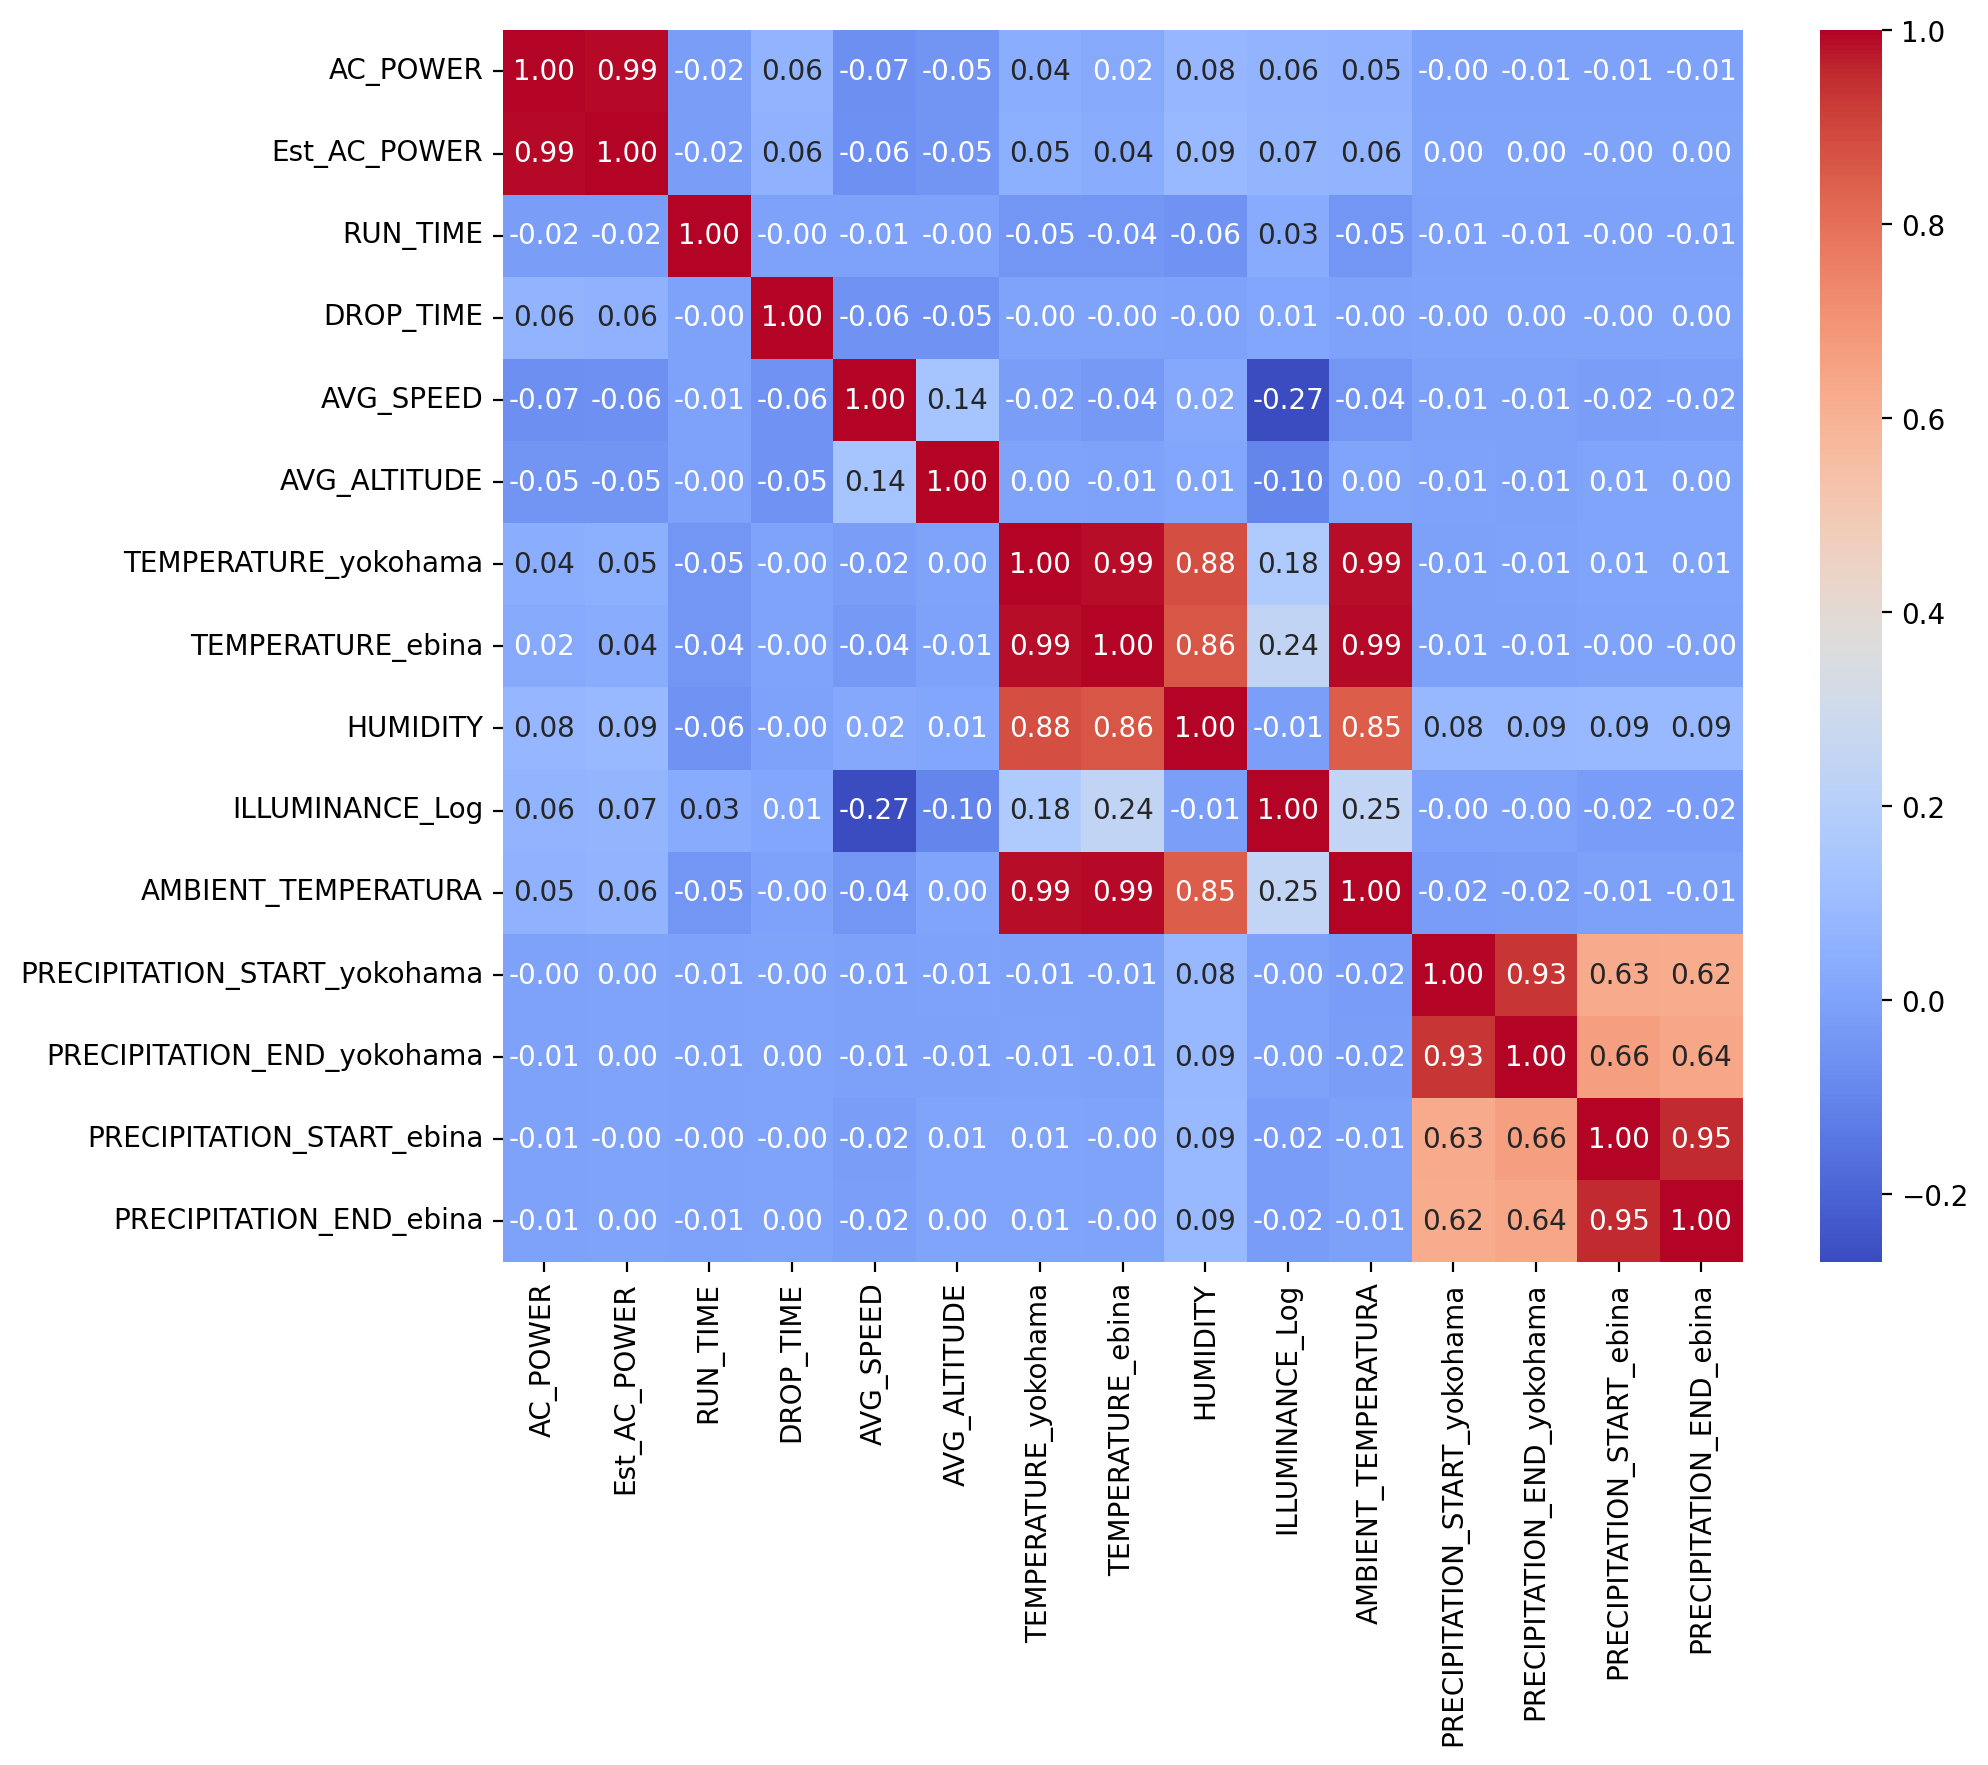

In [6]:
cols = ['AC_POWER','Est_AC_POWER','RUN_TIME','DROP_TIME','AVG_SPEED','AVG_ALTITUDE','TEMPERATURE_yokohama','TEMPERATURE_ebina','HUMIDITY','ILLUMINANCE_Log','AMBIENT_TEMPERATURA','PRECIPITATION_START_yokohama','PRECIPITATION_END_yokohama','PRECIPITATION_START_ebina','PRECIPITATION_END_ebina']

corr_matrix = dataset[cols].corr()
plt.figure(figsize=(10, 8),dpi=200)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [7]:
dataset['AVG_TEMPERATURE'] = (dataset.TEMPERATURE_yokohama + dataset.TEMPERATURE_ebina)/2
dataset['AVG_PRECIPITATION_START'] = (dataset.PRECIPITATION_START_yokohama + dataset.PRECIPITATION_START_ebina)/2
dataset['AVG_PRECIPITATION_END'] = (dataset.PRECIPITATION_END_yokohama + dataset.PRECIPITATION_END_ebina)/2

features = ['RUN_TIME','DROP_TIME','AVG_SPEED','AVG_ALTITUDE','AVG_TEMPERATURE','HUMIDITY','ILLUMINANCE_Log','AVG_PRECIPITATION_START','AVG_PRECIPITATION_END']
X = dataset[features]
y = dataset['Est_AC_POWER']

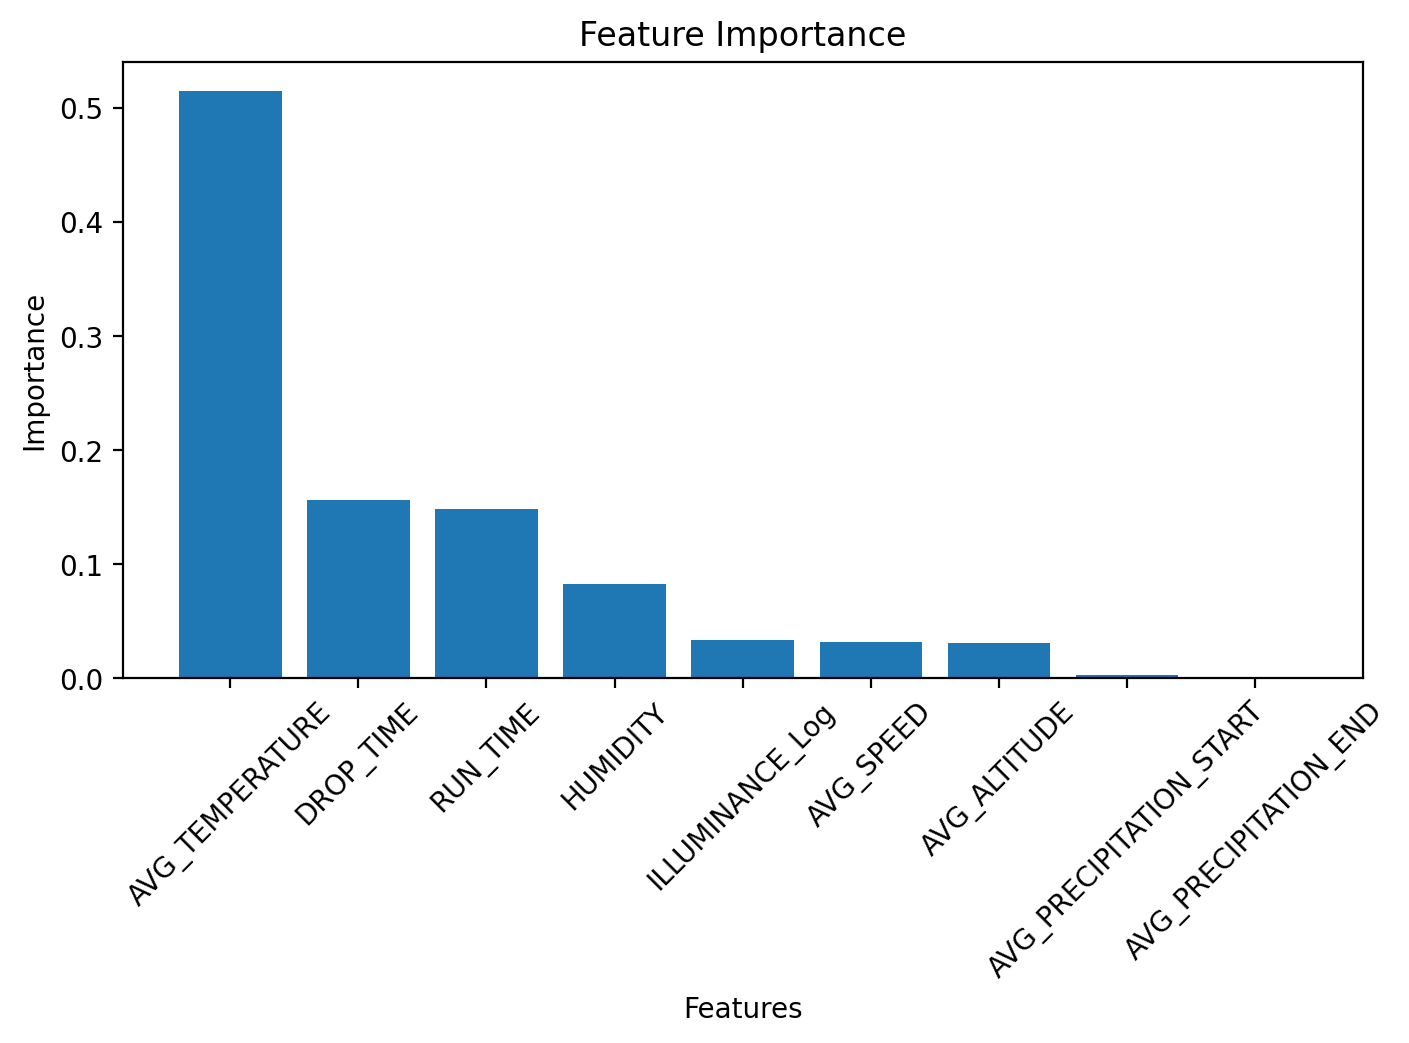

In [8]:
model = DecisionTreeRegressor()
model.fit(X, y)
importances = model.feature_importances_
feature_importances = pd.DataFrame(importances, index=X.columns, columns=["Importance"])
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8, 4),dpi=200)
plt.bar(feature_importances.index, feature_importances['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()

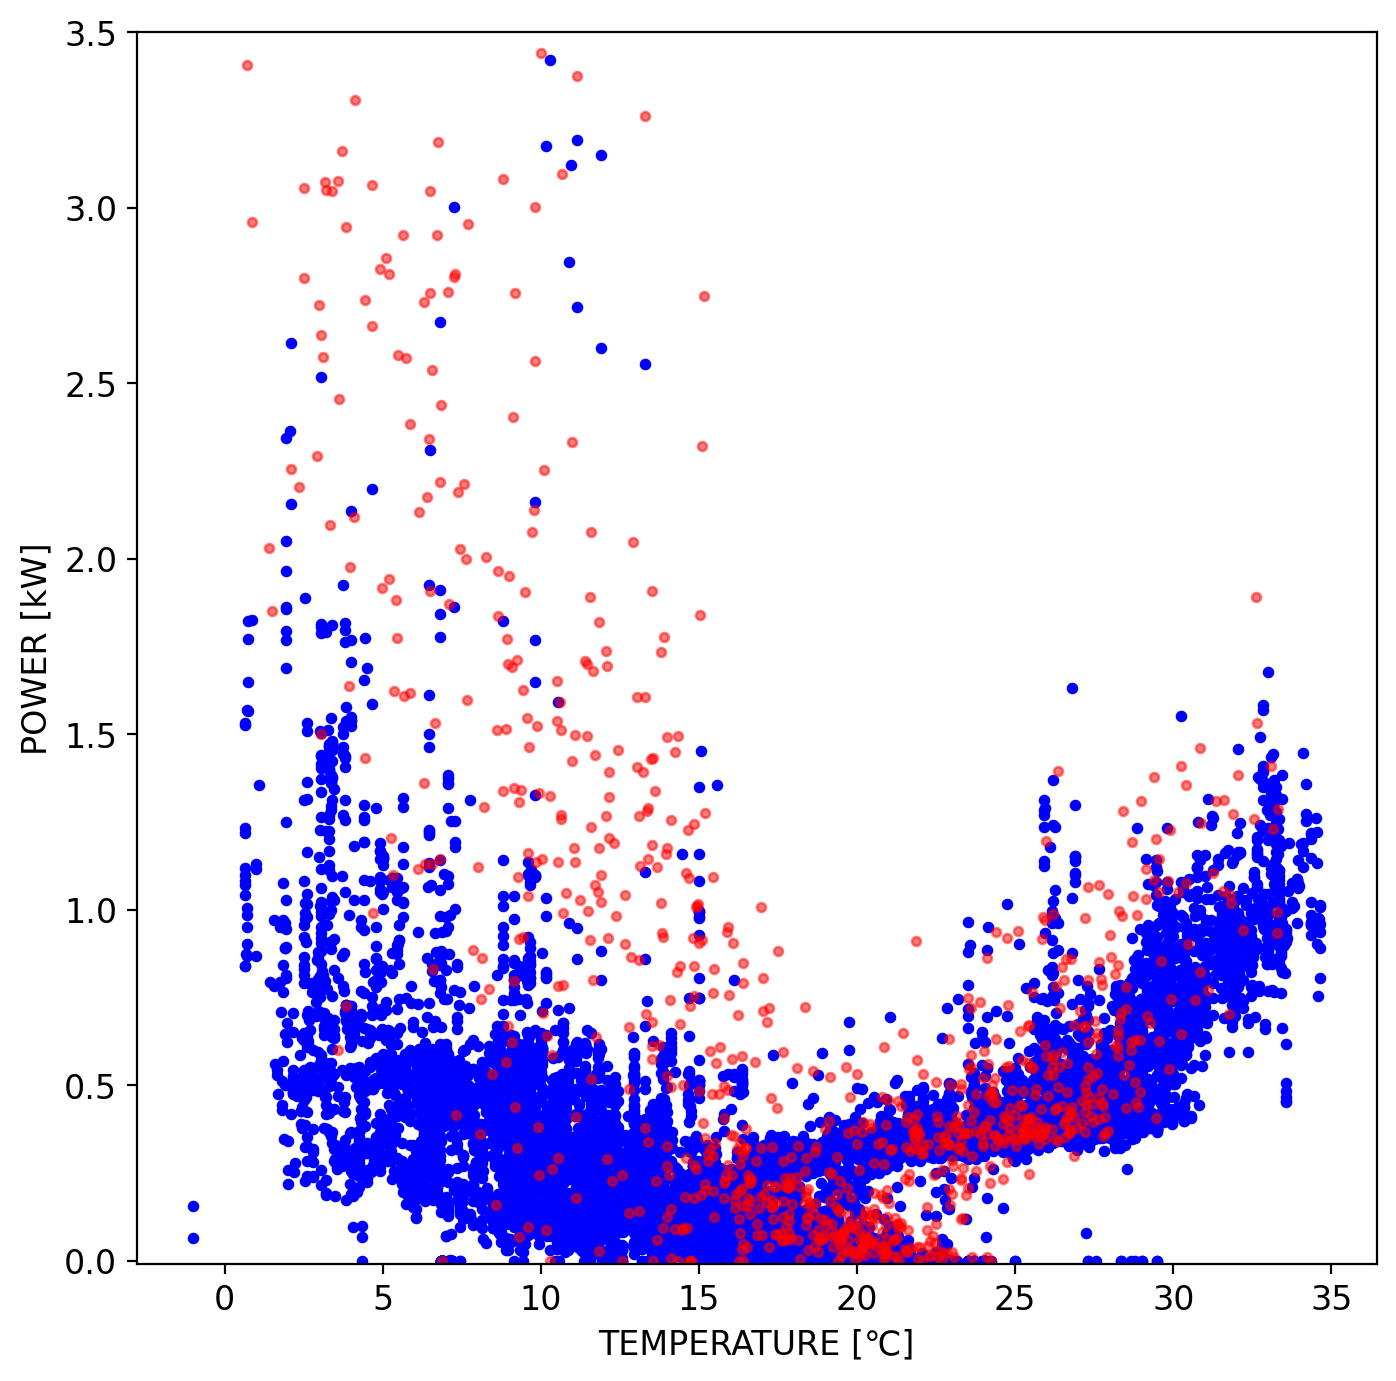

In [9]:
high_model = dataset[dataset['DROP_TIME'] != 0]
low_model = dataset[dataset['DROP_TIME'] == 0]

plt.figure(figsize=(8, 8),dpi=200)

plt.scatter(low_model['AVG_TEMPERATURE'],low_model['Est_AC_POWER']/1000,s=10,c='b',label='低出力モード')
plt.scatter(high_model['AVG_TEMPERATURE'],high_model['Est_AC_POWER']/1000,s=10,c='r',alpha=0.5,label='高出力モード')

plt.xlabel('TEMPERATURE [℃]',fontsize=12)
plt.ylabel('POWER [kW]',fontsize=12)
plt.tick_params(labelsize=12)
plt.ylim(-0.01,3.5)

plt.show()

# 気温が最も重要な特徴量であることが分かった。しかし、気温ごとの出力のバラつきが大きい。そのため、外れ値を検出し除外する。
# ±2α、IQR、Z_Score、KMeansの四つの手法を試した結果、±2αとIQRが一番良さそう。両方とも異常値と判断された場合は、それを異常値として扱う。

In [10]:
df_detect_outliers = dataset.groupby(['TRIP_ID'],as_index=False).mean(numeric_only=True)
df_detect_outliers['ROUND_TEMPERATURE'] = round(df_detect_outliers['AVG_TEMPERATURE'])

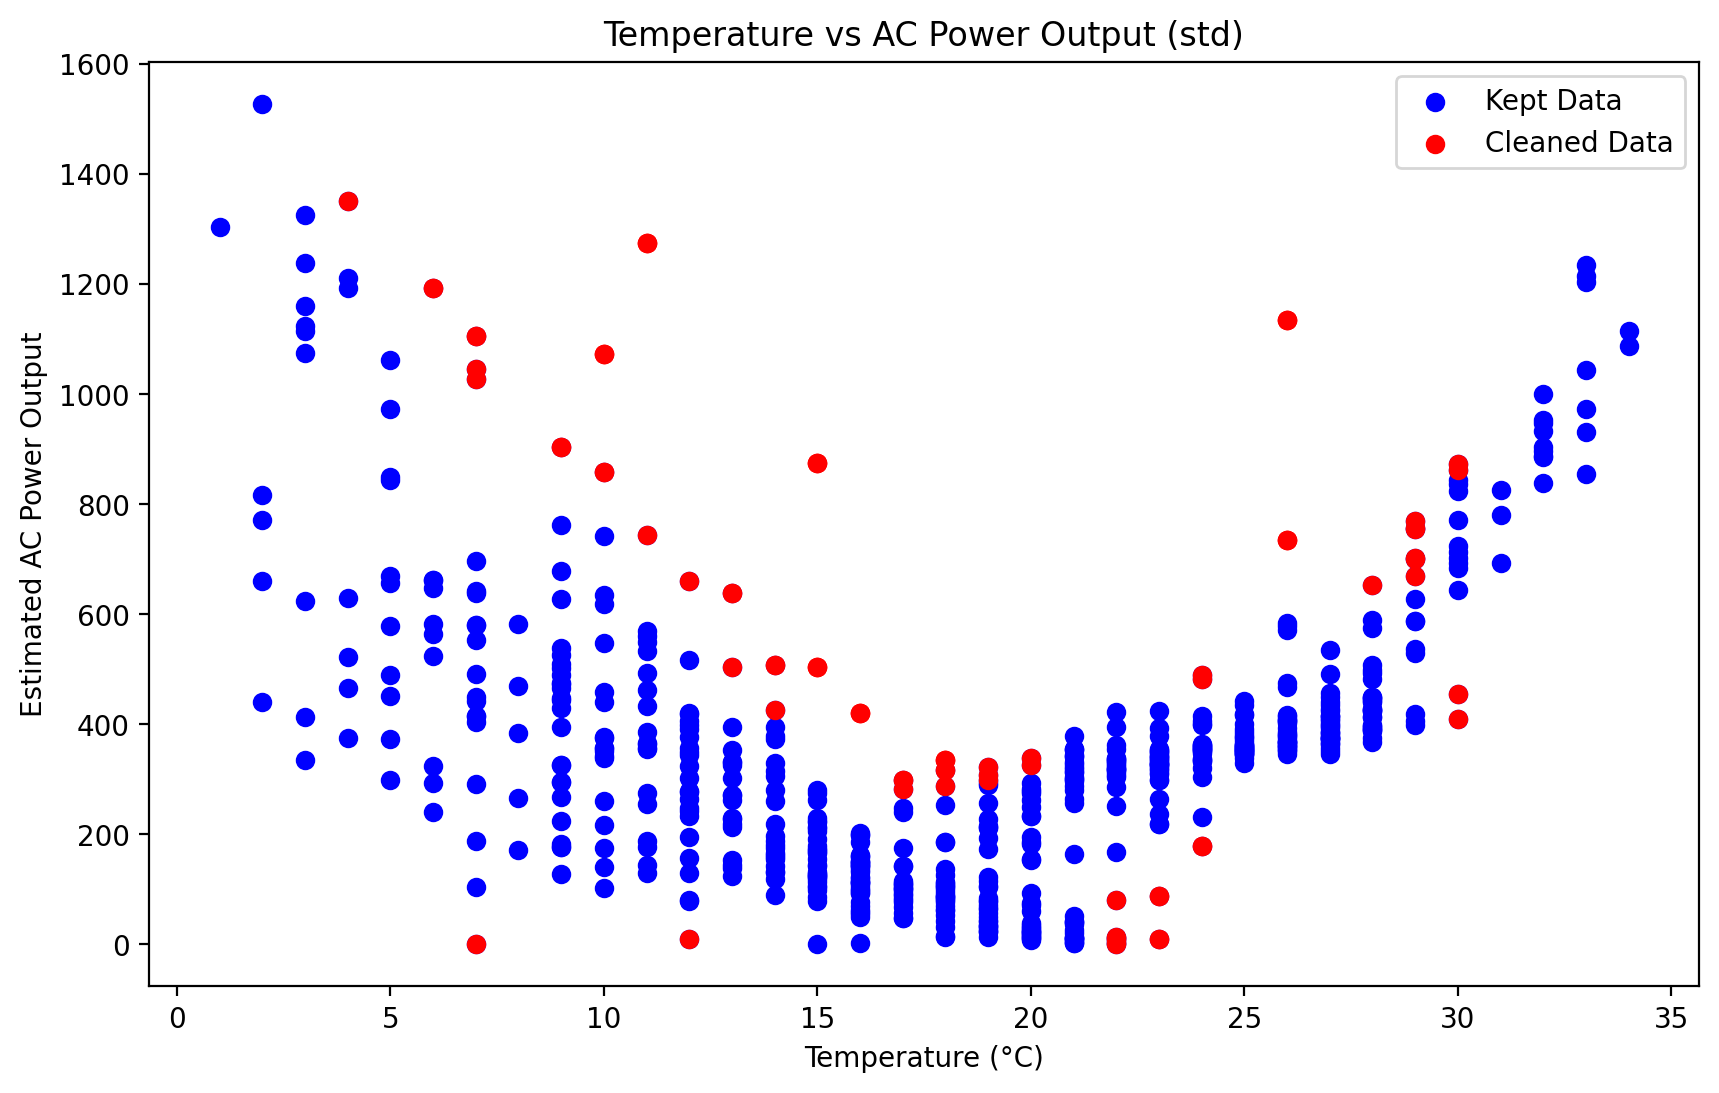

In [11]:
cleaned_df = pd.DataFrame()
removed_df = pd.DataFrame()

sorted_temps = np.sort(df_detect_outliers['ROUND_TEMPERATURE'].unique())

for i in range(len(sorted_temps) - 2):
    temp_range = sorted_temps[i:i + 3]
    group = df_detect_outliers[df_detect_outliers['ROUND_TEMPERATURE'].isin(temp_range)]
    
    mean_value = group['Est_AC_POWER'].mean()
    std_dev = group['Est_AC_POWER'].std()
    
    if std_dev > 0:
        is_normal = group.apply(lambda row: abs(row['Est_AC_POWER'] - mean_value) <= 2 * std_dev, axis=1)
        
        cleaned_data = group[is_normal]
        removed_data = group[~is_normal]
        
        cleaned_df = pd.concat([cleaned_df, cleaned_data], ignore_index=True)
        removed_df = pd.concat([removed_df, removed_data], ignore_index=True)
    else:
        cleaned_df = pd.concat([cleaned_df, group], ignore_index=True)

cleaned_df = cleaned_df.drop_duplicates()
removed_df_std = removed_df.copy()

plt.figure(figsize=(10, 6),dpi=200)
plt.scatter(cleaned_df['ROUND_TEMPERATURE'], cleaned_df['Est_AC_POWER'], c='blue', label='Kept Data')
plt.scatter(removed_df['ROUND_TEMPERATURE'], removed_df['Est_AC_POWER'], c='red', label='Cleaned Data')

plt.title('Temperature vs AC Power Output (std)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Estimated AC Power Output')
plt.legend()
plt.show()

C:\Users\ELMO_HX\AppData\Local\Temp\ipykernel_21300\521196237.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_IQR.loc[(df_IQR['ROUND_TEMPERATURE'].isin(temp_range)) & ((df_IQR['Est_AC_POWER'] < lower_bound) | (df_IQR['Est_AC_POWER'] > upper_bound)), 'Outlier'] = True


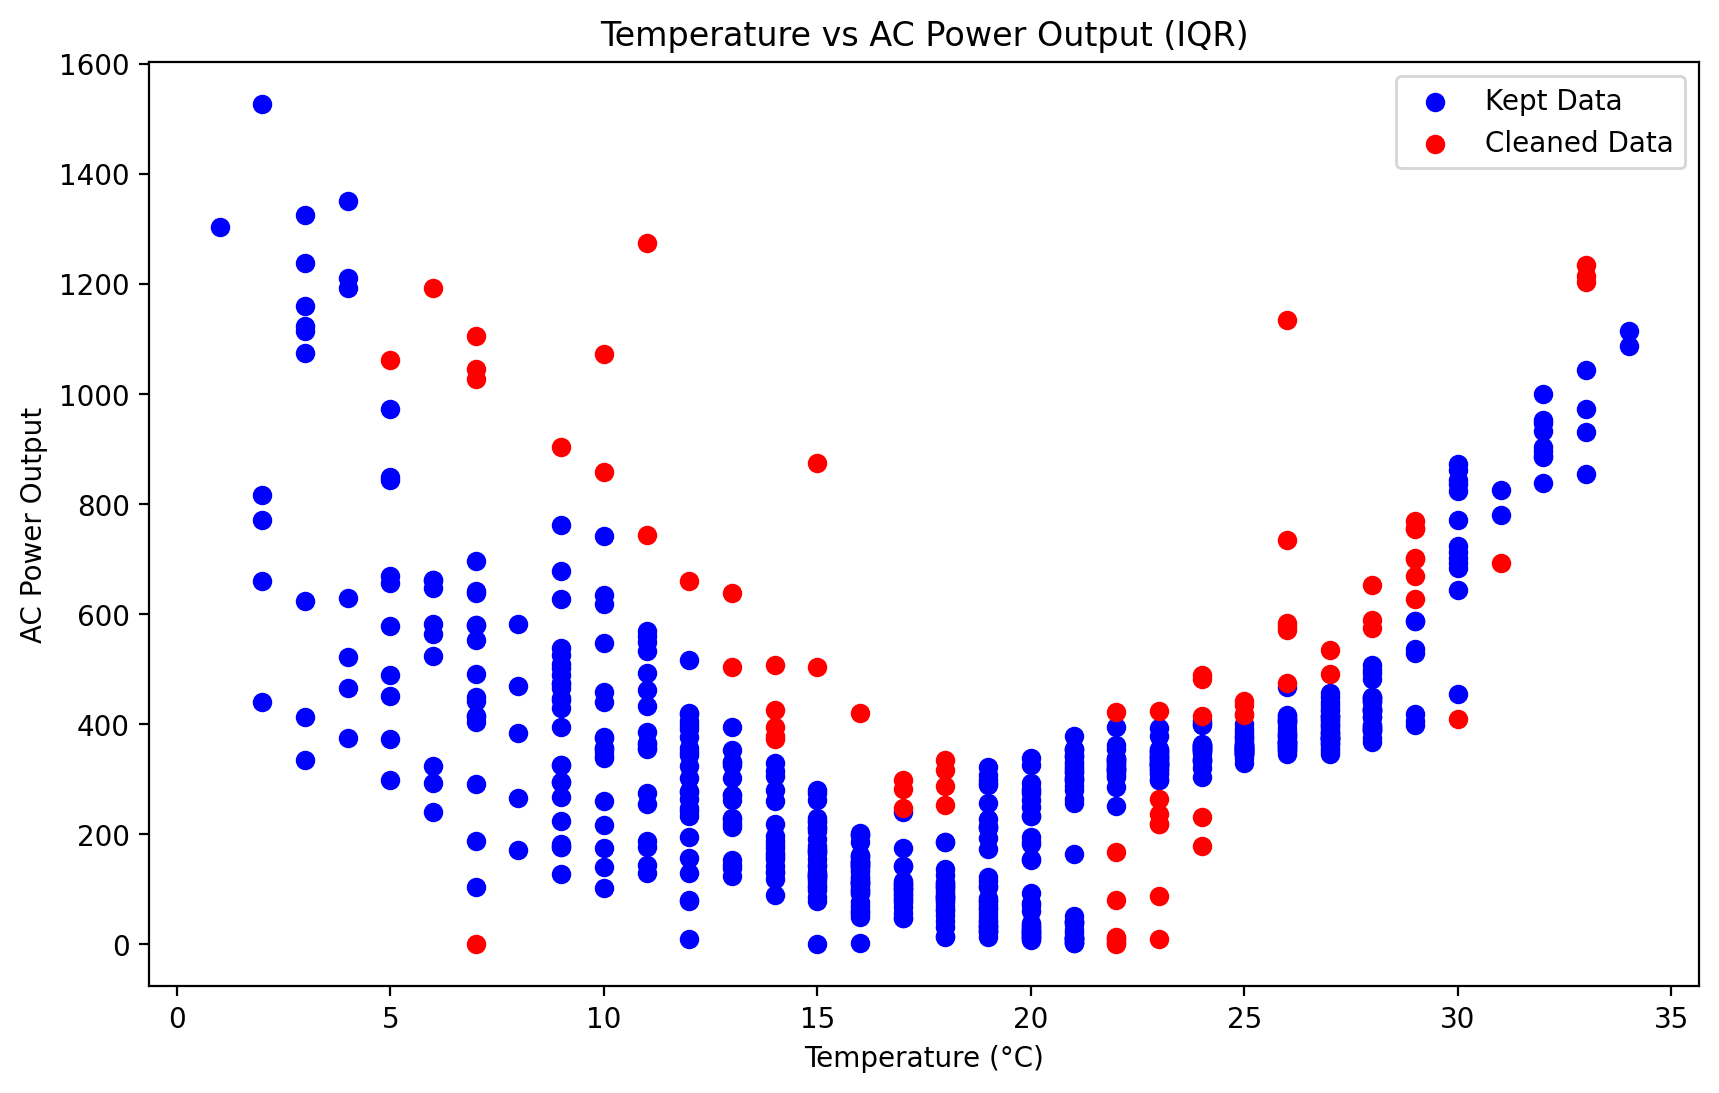

In [12]:
cleaned_df = pd.DataFrame()
removed_df = pd.DataFrame()

sorted_temps = np.sort(df_detect_outliers['ROUND_TEMPERATURE'].unique())

df_IQR = df_detect_outliers.copy()

for i in range(len(sorted_temps) - 2):
    temp_range = sorted_temps[i:i + 3]
    group = df_detect_outliers[df_detect_outliers['ROUND_TEMPERATURE'].isin(temp_range)]
    
    Q1 = group['Est_AC_POWER'].quantile(0.25)
    Q3 = group['Est_AC_POWER'].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_IQR.loc[(df_IQR['ROUND_TEMPERATURE'].isin(temp_range)) & ((df_IQR['Est_AC_POWER'] < lower_bound) | (df_IQR['Est_AC_POWER'] > upper_bound)), 'Outlier'] = True
    
df_IQR['Outlier'].fillna(False, inplace=True)

cleaned_df = df_IQR[df_IQR['Outlier'] == False]
removed_df = df_IQR[df_IQR['Outlier'] == True]

removed_df_IQR = removed_df.copy()

plt.figure(figsize=(10, 6),dpi=200)
plt.scatter(cleaned_df['ROUND_TEMPERATURE'], cleaned_df['Est_AC_POWER'], c='blue', label='Kept Data')
plt.scatter(removed_df['ROUND_TEMPERATURE'], removed_df['Est_AC_POWER'], c='red', label='Cleaned Data')
plt.legend()
plt.title('Temperature vs AC Power Output (IQR)')
plt.xlabel('Temperature (°C)')
plt.ylabel('AC Power Output')
plt.show()

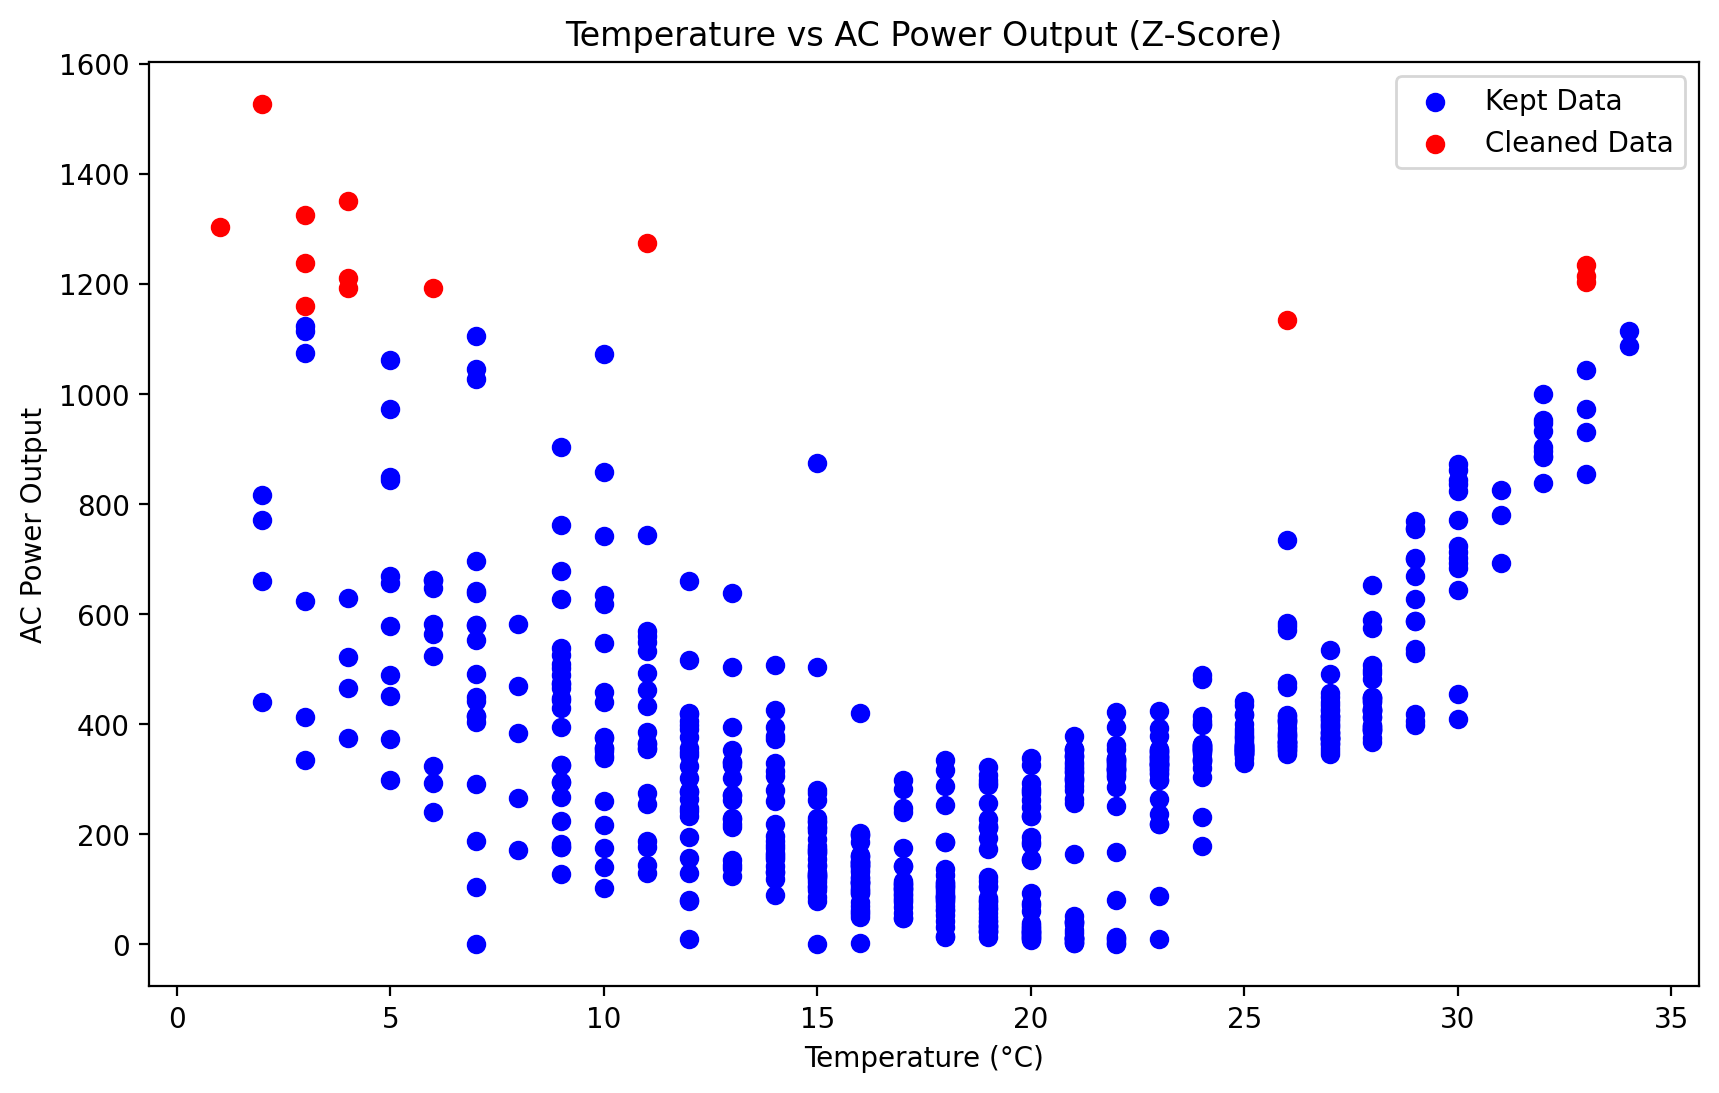

In [47]:
cleaned_df = pd.DataFrame()
removed_df = pd.DataFrame()

Z_Score_df = df_detect_outliers.copy()
Z_Score_df['Z_Score'] = stats.zscore(Z_Score_df['Est_AC_POWER'])
z_score_threshold = 3
Z_Score_df['Outlier'] = (Z_Score_df['Z_Score'] > z_score_threshold) | (Z_Score_df['Z_Score'] < -z_score_threshold)

cleaned_df = Z_Score_df[Z_Score_df['Outlier'] == False]
removed_df = Z_Score_df[Z_Score_df['Outlier'] == True]

plt.figure(figsize=(10, 6),dpi=200)
plt.scatter(cleaned_df['ROUND_TEMPERATURE'], cleaned_df['Est_AC_POWER'], c='blue', label='Kept Data')
plt.scatter(removed_df['ROUND_TEMPERATURE'], removed_df['Est_AC_POWER'], c='red', label='Cleaned Data')
plt.legend()
plt.title('Temperature vs AC Power Output (Z-Score)')
plt.xlabel('Temperature (°C)')
plt.ylabel('AC Power Output')
plt.show()

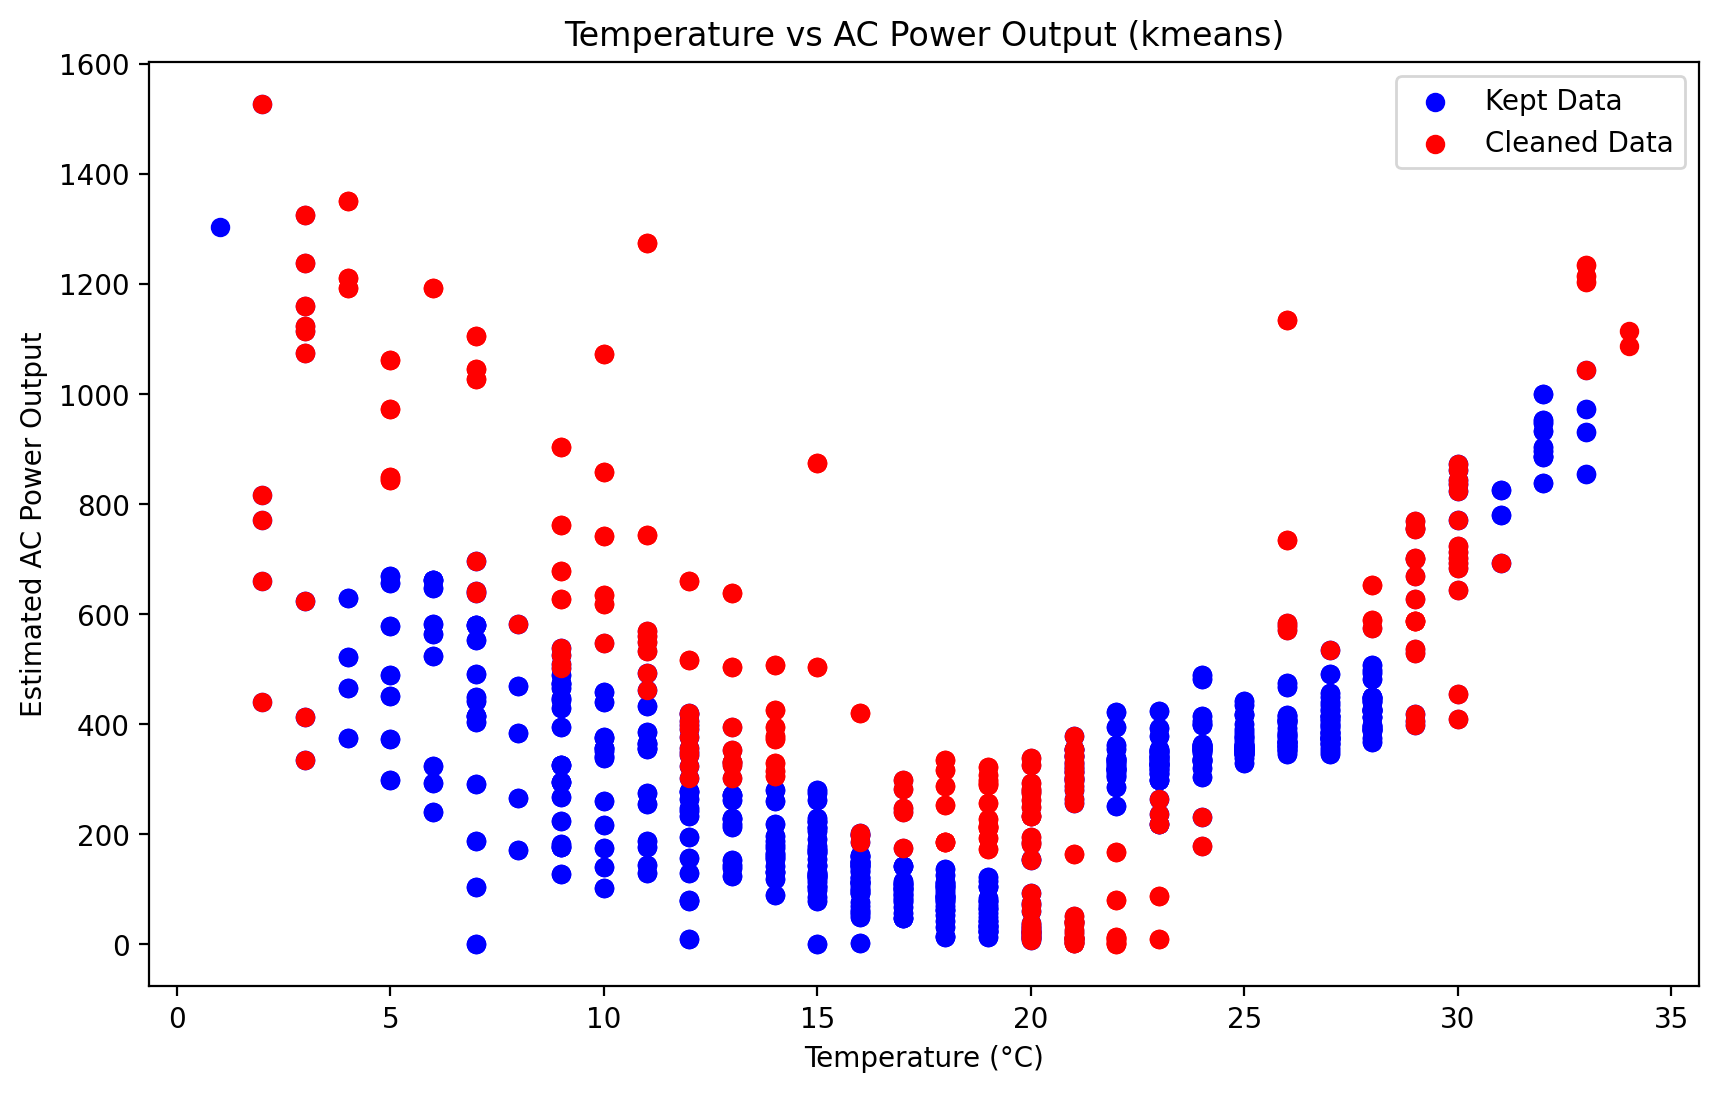

In [48]:
cleaned_df = pd.DataFrame()
removed_df = pd.DataFrame()

for i in range(len(sorted_temps) - 2):
    temp_range = sorted_temps[i:i + 3]
    group = df_detect_outliers[df_detect_outliers['ROUND_TEMPERATURE'].isin(temp_range)]
    
    if len(group) > 1:
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            kmeans = KMeans(n_clusters=2)
            group = group.copy()
            group['Cluster'] = kmeans.fit_predict(group[['Est_AC_POWER']])
        
        normal_cluster_label = group['Cluster'].value_counts().idxmax()
        normal_data = group[group['Cluster'] == normal_cluster_label]
        anomalies = group[group['Cluster'] != normal_cluster_label]
    
        cleaned_df = pd.concat([cleaned_df, normal_data], ignore_index=True)
        removed_df = pd.concat([removed_df, anomalies], ignore_index=True)
    else:
        cleaned_df = pd.concat([cleaned_df, group], ignore_index=True)


cleaned_df = cleaned_df.drop('Cluster', axis=1)

plt.figure(figsize=(10, 6),dpi=200)
plt.scatter(cleaned_df['ROUND_TEMPERATURE'], cleaned_df['Est_AC_POWER'], c='blue', label='Kept Data')
plt.scatter(removed_df['ROUND_TEMPERATURE'], removed_df['Est_AC_POWER'], c='red', label='Cleaned Data')

plt.title('Temperature vs AC Power Output (kmeans)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Estimated AC Power Output')
plt.legend()
plt.show()

In [13]:
cleaned_dataset = dataset[~dataset['TRIP_ID'].isin(set(list(removed_df_std.TRIP_ID)) | set(list(removed_df_IQR.TRIP_ID)))]
cleaned_dataset.to_csv("cleand_dataset.csv")
cleaned_dataset.tail()

,Unnamed: 0,TRIP_ID,SUB_ID,SEGMENT_ID,START_TIME,END_TIME,START_LATITUDE,START_LONGITUDE,LAST_LATITUDE,LAST_LONGITUDE,START_ALTITUDE,LAST_ALTITUDE,AVG_ALTITUDE,START_SOC,END_SOC,START_GIDS,END_GIDS,SOH,AVG_SPEED,RUN_TIME,TRIP_TIME,DROP_TIME,BETTERY_TEMPERATURA,AMBIENT_TEMPERATURA,EV_POWER,RUN_POWER,AUX_POWER,AC_POWER,Est_AC_POWER,ALL_Consumption_Wh,RUN_Consumption_Wh,AUX_Consumption_Wh,AC_Consumption_Wh,EST_AC_Consumption_Wh,TEMPERATURE_yokohama,TEMPERATURE_ebina,HUMIDITY,WIND_SPEED_yokohama,WIND_SPEED_ebina,ILLUMINANCE,PRECIPITATION_START_yokohama,PRECIPITATION_END_yokohama,PRECIPITATION_START_ebina,PRECIPITATION_END_ebina,WEATHER,ILLUMINANCE_Log,TRIP_TEMPERATURE,AVG_TEMPERATURE,AVG_PRECIPITATION_START,AVG_PRECIPITATION_END
17464,17464,4560,1,22,2023-08-30 10:50:00,2023-08-30 10:50:00,35.449129,139.567853,35.452739,139.576851,57.7,64.2,59.858333,728318,726240,522,521,91.97,70.764000,3817.0,51.0,0.0,32.358333,32.833333,8988.018412,8038.018412,200.000000,750.000000,666.666667,123.898511,110.440178,2.833333,10.625000,9.444444,31.9,31.799999,20.857681,5.20,3.5,38488.187489,0.0,0.0,0.0,0.0,晴のち曇,4,32.000791,31.849999,0.0,0.0
17465,17465,4560,1,23,2023-08-30 10:50:00,2023-08-30 11:00:00,35.452996,139.577632,35.458544,139.585216,60.5,34.8,46.375000,726224,726472,521,521,91.97,70.881001,3868.0,51.0,0.0,32.366667,33.000000,-1109.831677,-2059.831677,200.000000,750.000000,716.666667,-15.617443,-29.075777,2.833333,10.625000,10.166667,31.9,31.974999,21.109992,5.15,3.4,37195.114358,0.0,0.0,0.0,0.0,晴のち曇,4,32.000791,31.937500,0.0,0.0
17466,17466,4560,1,24,2023-08-30 11:00:00,2023-08-30 11:00:00,35.459174,139.585967,35.465691,139.591233,32.4,24.4,24.725000,726530,725422,521,520,91.97,69.768000,3918.0,50.0,0.0,32.386111,33.291667,4570.528872,3620.528872,200.000000,750.000000,720.833333,62.262229,49.067784,2.777778,10.416667,10.000000,31.9,32.500000,21.866924,5.00,3.1,33315.894966,0.0,0.0,0.0,0.0,晴のち曇,4,32.000791,32.200000,0.0,0.0
17467,17467,4560,1,25,2023-08-30 11:00:00,2023-08-30 11:00:00,35.466307,139.591511,35.472796,139.595000,25.8,49.0,42.200000,725100,722048,520,518,91.97,27.947172,4047.0,129.0,0.0,32.440230,33.500000,4200.582567,3250.582567,200.000000,750.000000,743.103448,132.393101,98.351435,7.166667,26.875000,26.527778,31.9,32.500000,21.866924,5.00,3.1,33315.894966,0.0,0.0,0.0,0.0,晴のち曇,4,32.000791,32.200000,0.0,0.0
17468,17468,4560,1,26,2023-08-30 11:00:00,2023-08-30 11:00:00,35.472929,139.594838,35.472286,139.586766,49.3,50.9,48.887097,721812,718416,518,515,91.97,15.419032,4310.0,263.0,0.0,32.493011,33.233871,2664.847759,1729.363888,217.741935,717.741935,740.322581,192.796632,124.282743,15.944444,52.569444,54.180556,31.9,32.500000,21.866924,5.00,3.1,33315.894966,0.0,0.0,0.0,0.0,晴のち曇,4,32.000791,32.200000,0.0,0.0


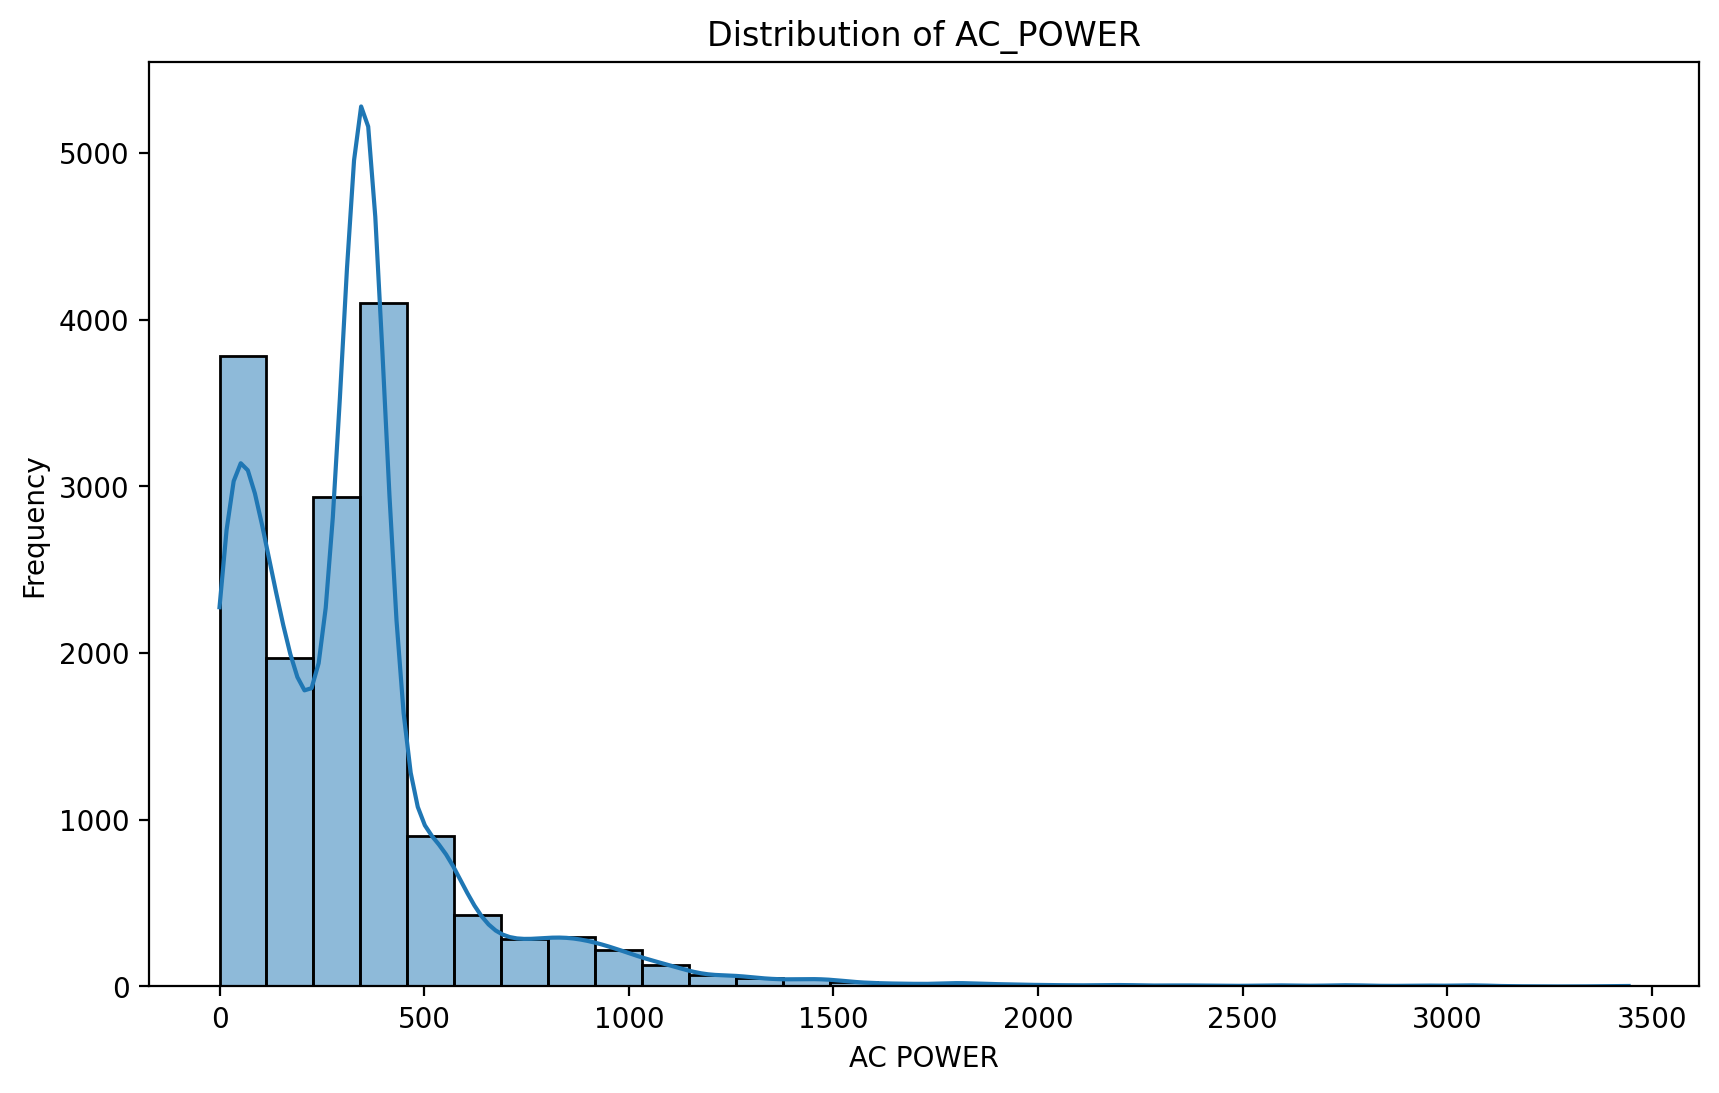

In [50]:
plt.figure(figsize=(10, 6),dpi=200)
sns.histplot(cleaned_dataset['Est_AC_POWER'], kde=True, bins=30)
plt.title(f'Distribution of AC_POWER')
plt.xlabel('AC POWER')
plt.ylabel('Frequency')
plt.show()

D:\Anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


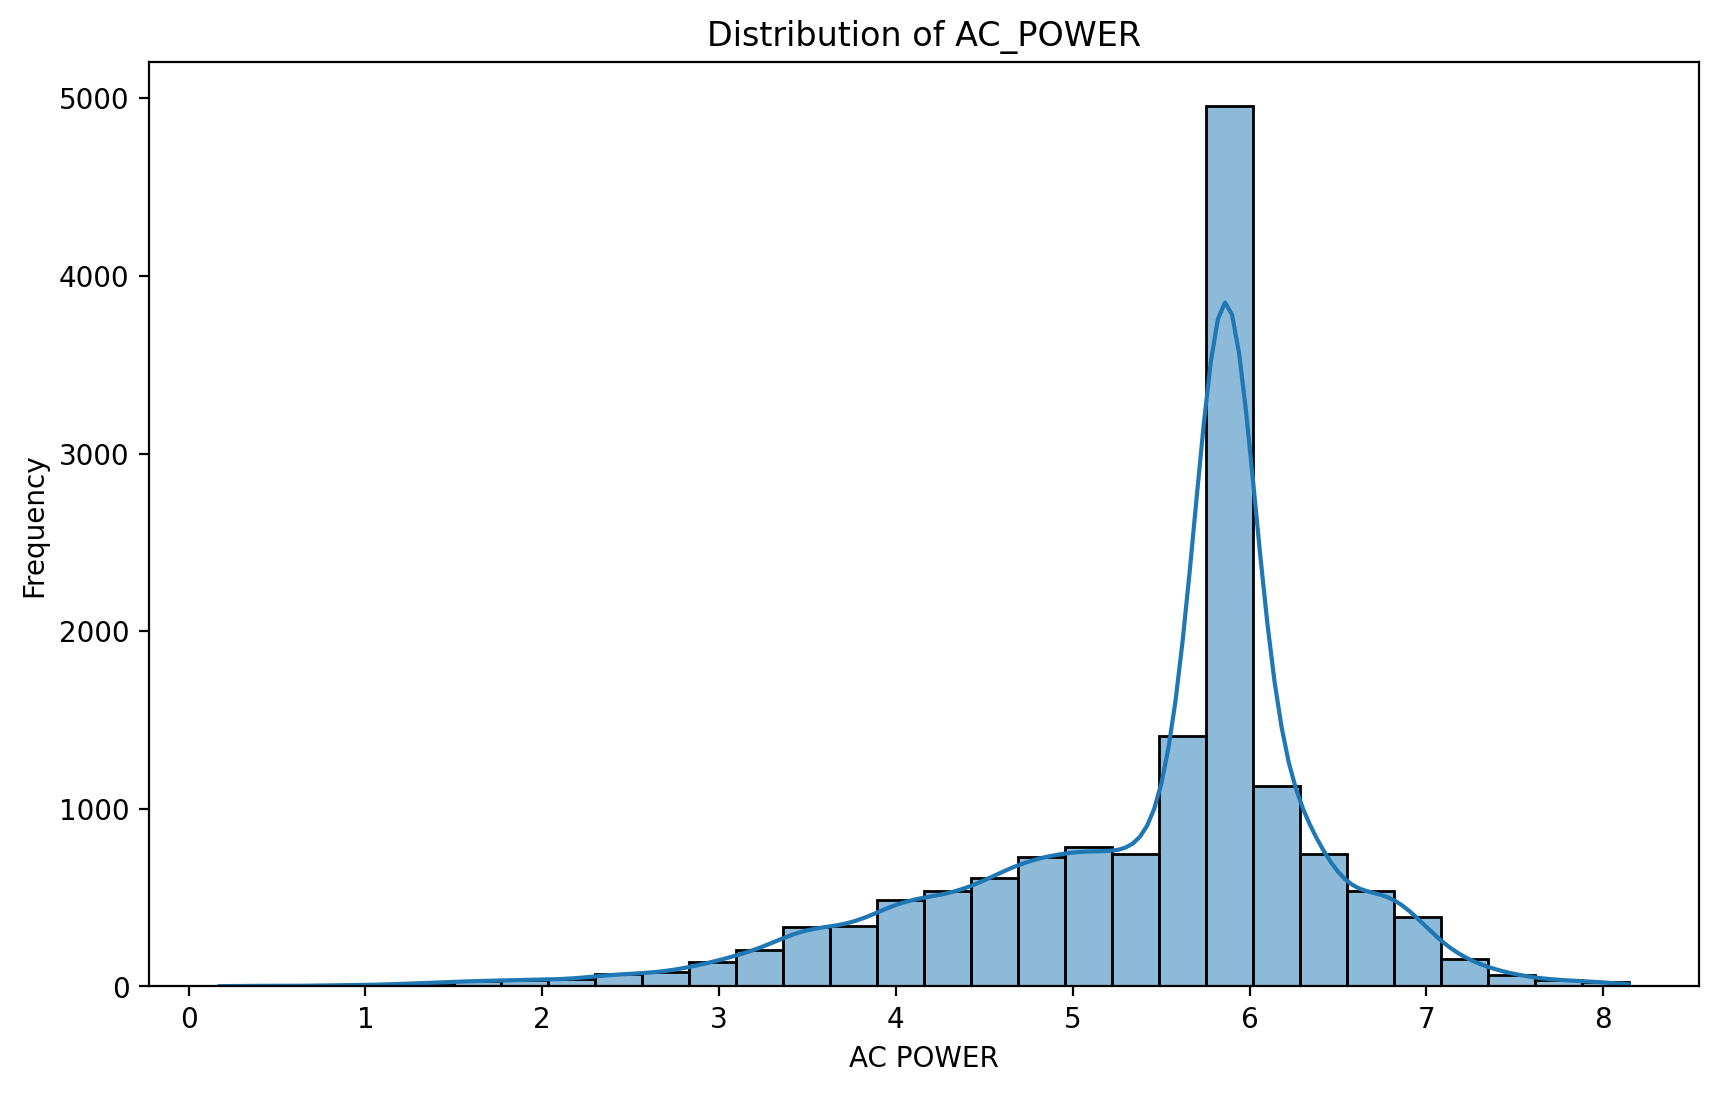

In [51]:
plt.figure(figsize=(10, 6),dpi=200)
sns.histplot(np.log(cleaned_dataset['Est_AC_POWER']), kde=True, bins=30)
plt.title(f'Distribution of AC_POWER')
plt.xlabel('AC POWER')
plt.ylabel('Frequency')
plt.show()

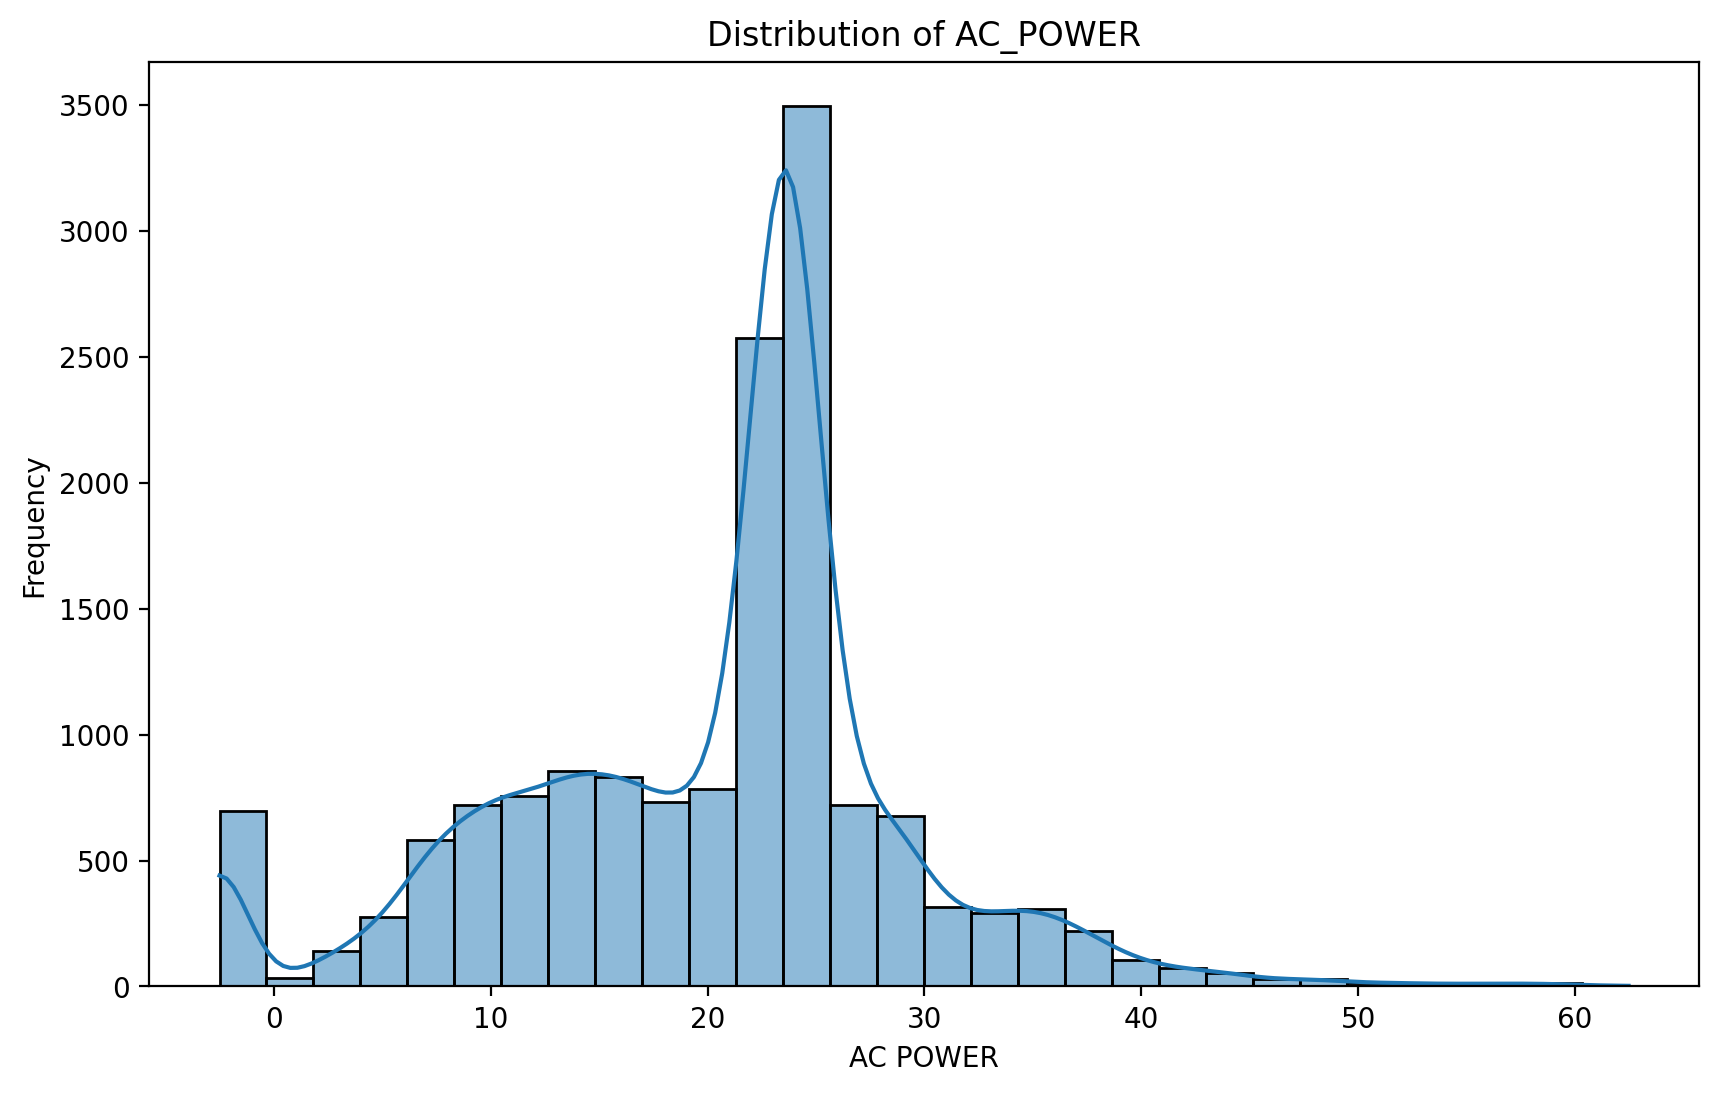

In [52]:
plt.figure(figsize=(10, 6),dpi=200)
sns.histplot(boxcox(cleaned_dataset['Est_AC_POWER'], 0.4), kde=True, bins=30)
plt.title(f'Distribution of AC_POWER')
plt.xlabel('AC POWER')
plt.ylabel('Frequency')
plt.show()